## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import string
import re
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout,Embedding,Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.preprocessing.text import Tokenizer 

## Importing Dataset

In [2]:
df_real = pd.read_csv('True.csv', sep=',', encoding='latin-1', error_bad_lines=False)

df_fake = pd.read_csv('Fake.csv', sep=',',encoding='latin-1', error_bad_lines=False) 

b'Skipping line 11067: expected 4 fields, saw 8\n'


In [3]:
df_real = pd.read_csv('True.csv', sep=',', encoding='latin1', on_bad_lines='skip') 

In [4]:
df_real 

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21411,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21412,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21413,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21414,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [5]:
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied Safe Zone Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


##### Inserting a column "class" as target feature

In [6]:
df_fake["class"] = 0
df_real["class"] = 1 

# Inserting a column "class" as target feature

In [7]:
df_fake.shape, df_real.shape 

((23481, 5), (21416, 5))

In [8]:
# Removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
for i in range(23469,23481,-1): 
    df_fake.drop([i], axis = 0, inplace = True)
    
    
df_real_manual_testing = df_real.tail(10) 
for i in range(21415,21405,-1): 
    df_real.drop([i], axis = 0, inplace = True) 

In [9]:
df_fake.shape, df_real.shape 

((23481, 5), (21406, 5))

In [10]:
print(df_fake.index)

RangeIndex(start=0, stop=23481, step=1)


In [11]:
df_fake_manual_testing["class"] = 0
df_real_manual_testing["class"] = 1

# Assigning Classes to the Dataset

In [12]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: Israel First (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied Safe Zone Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [13]:
df_real_manual_testing.head(10) 

,title,text,subject,date,class
21406,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21407,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21410,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21411,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21412,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21413,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21414,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21415,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [14]:
df_manual_testing = pd.concat([df_fake_manual_testing, df_real_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv") 

##### Merging True and Fake Dataframes

In [15]:
df_merge = pd.concat([df_fake, df_real], axis = 0 )
df_merge.head(10) 

#Merging True and Fake Dataframes
# df = pd.concat([df_fake, df_real],ignore_index=True, sort=False)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [16]:
df_merge.columns 

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [17]:
df_merge.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44887 entries, 0 to 21405
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44887 non-null  object
 1   text     44887 non-null  object
 2   subject  44887 non-null  object
 3   date     44887 non-null  object
 4   class    44887 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


##### Removing columns which are not required 

In [18]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

# Removing columns which are not required

In [19]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [20]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44887 entries, 0 to 21405
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44887 non-null  object
 1   class   44887 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


##### Random Shuffling the Data-Frame 

In [21]:
df = df.sample(frac = 1) 

In [22]:
df.head()

,text,class
10342,Please note that this unhinged woman is a midd...,0
7557,Tensions ran high outside of a campaign rally ...,0
18528,This unbelievable story of unbridled censorshi...,0
2802,Republican Congressman Charlie Dent represents...,0
2495,WASHINGTON (Reuters) - U.S. officials are disc...,1


In [23]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [24]:
df.columns

Index(['text', 'class'], dtype='object')

In [25]:
df.head()

,text,class
0,Please note that this unhinged woman is a midd...,0
1,Tensions ran high outside of a campaign rally ...,0
2,This unbelievable story of unbridled censorshi...,0
3,Republican Congressman Charlie Dent represents...,0
4,WASHINGTON (Reuters) - U.S. officials are disc...,1


### Creating a Function to Process the texts

In [26]:
# Create a Function to Clean Text
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text


In [27]:
df["text"] = df["text"].apply(wordopt) 

class
0    23481
1    21406
Name: text, dtype: int64


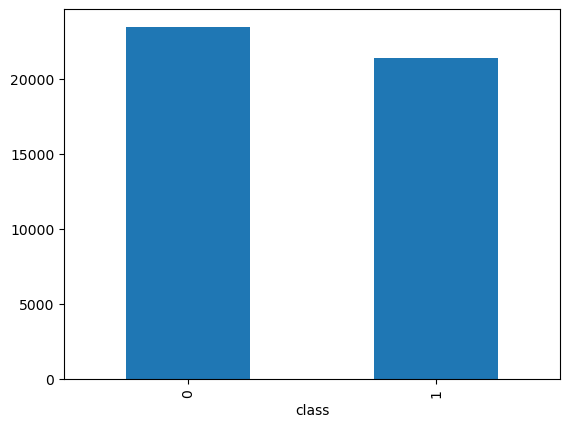

In [28]:
# How many articles per class? 

print(df.groupby(['class'])['text'].count())
df.groupby(['class'])['text'].count().plot(kind="bar")
plt.show() 

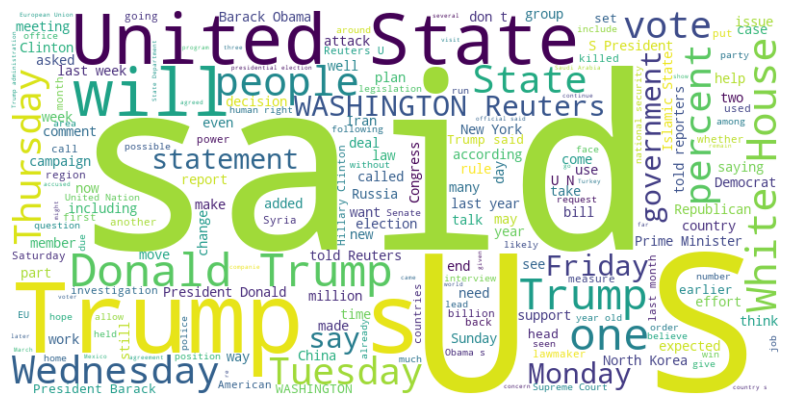

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df_real['text'] contains the text data for real news
real_text_data = df_real['text']

# Combine all the text into a single string
text = ' '.join(real_text_data)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() 

### For Real News

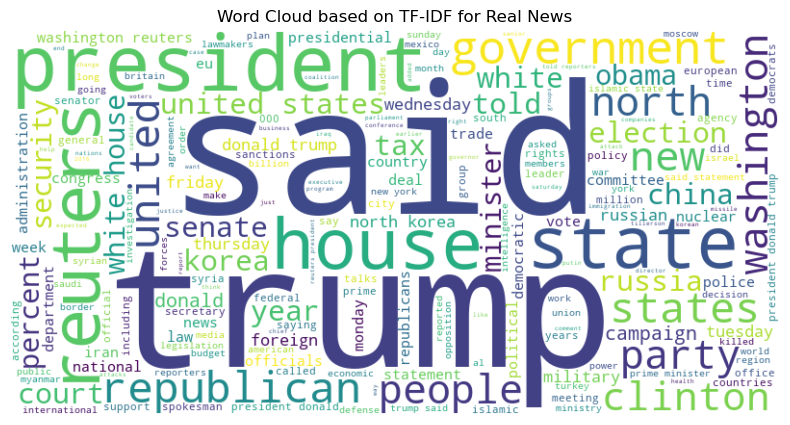

In [30]:
# TF-IDF for Real News
tfidf_vectorizer_real = TfidfVectorizer(stop_words='english', ngram_range=(1, 3))
tfidf_matrix_real = tfidf_vectorizer_real.fit_transform(df_real['text'])
feature_names_real = tfidf_vectorizer_real.get_feature_names_out()
average_tfidf_values_real = tfidf_matrix_real.mean(axis=0)
term_tfidf_dict_real = {feature_names_real[i]: average_tfidf_values_real[0, i] for i in range(len(feature_names_real))}
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(term_tfidf_dict_real)

# Plot the WordCloud image for real news
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud based on TF-IDF for Real News')
plt.show() 

### For fake News

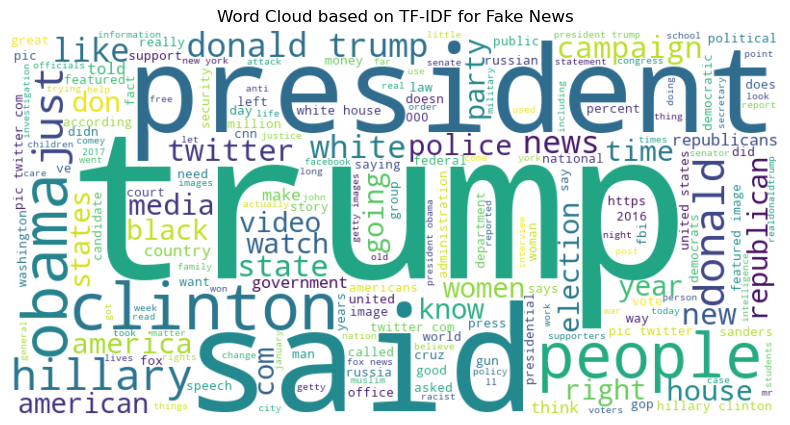

In [31]:
# TF-IDF for Fake News
tfidf_vectorizer_fake = TfidfVectorizer(stop_words='english', ngram_range=(1, 3))
tfidf_matrix_fake = tfidf_vectorizer_fake.fit_transform(df_fake['text'])
feature_names_fake = tfidf_vectorizer_fake.get_feature_names_out()
average_tfidf_values_fake = tfidf_matrix_fake.mean(axis=0)
term_tfidf_dict_fake = {feature_names_fake[i]: average_tfidf_values_fake[0, i] for i in range(len(feature_names_fake))}
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(term_tfidf_dict_fake)

# Plot the WordCloud image for Fake News
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud based on TF-IDF for Fake News')
plt.show() 

In [32]:
df 

,text,class
0,please note that this unhinged woman is a midd...,0
1,tensions ran high outside of a campaign rally ...,0
2,this unbelievable story of unbridled censorshi...,0
3,republican congressman charlie dent represents...,0
4,washington reuters u s officials are disc...,1
...,...,...
44882,thanks to the funding our gop majority congres...,0
44883,on friday freelance reporter and political co...,0
44884,ironically he killed cops protecting rights o...,0
44885,of course tomorrow morning the democrat party...,0


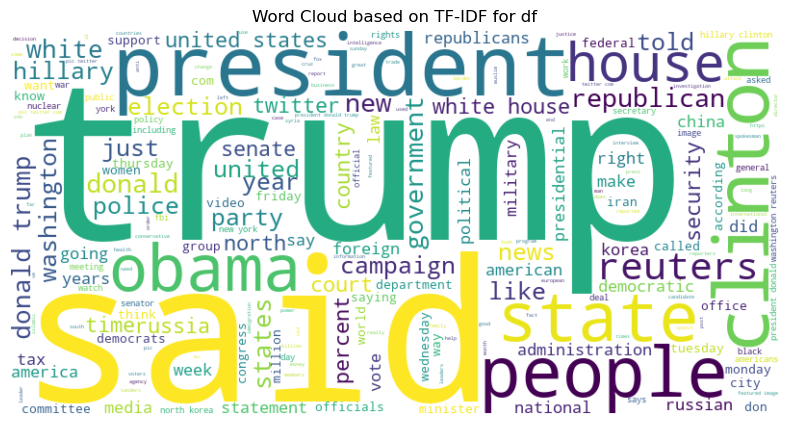

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1,3))
tfidf_matrix_df=tfidf_vectorizer.fit_transform(df['text'])
feature_names = tfidf_vectorizer.get_feature_names_out() 


average_tfidf_values = tfidf_matrix_df.mean(axis=0)
term_tfidf_dict = {feature_names[i]: average_tfidf_values[0, i] for i in range(len(feature_names))}
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(term_tfidf_dict)
# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud based on TF-IDF for df')
plt.show() 

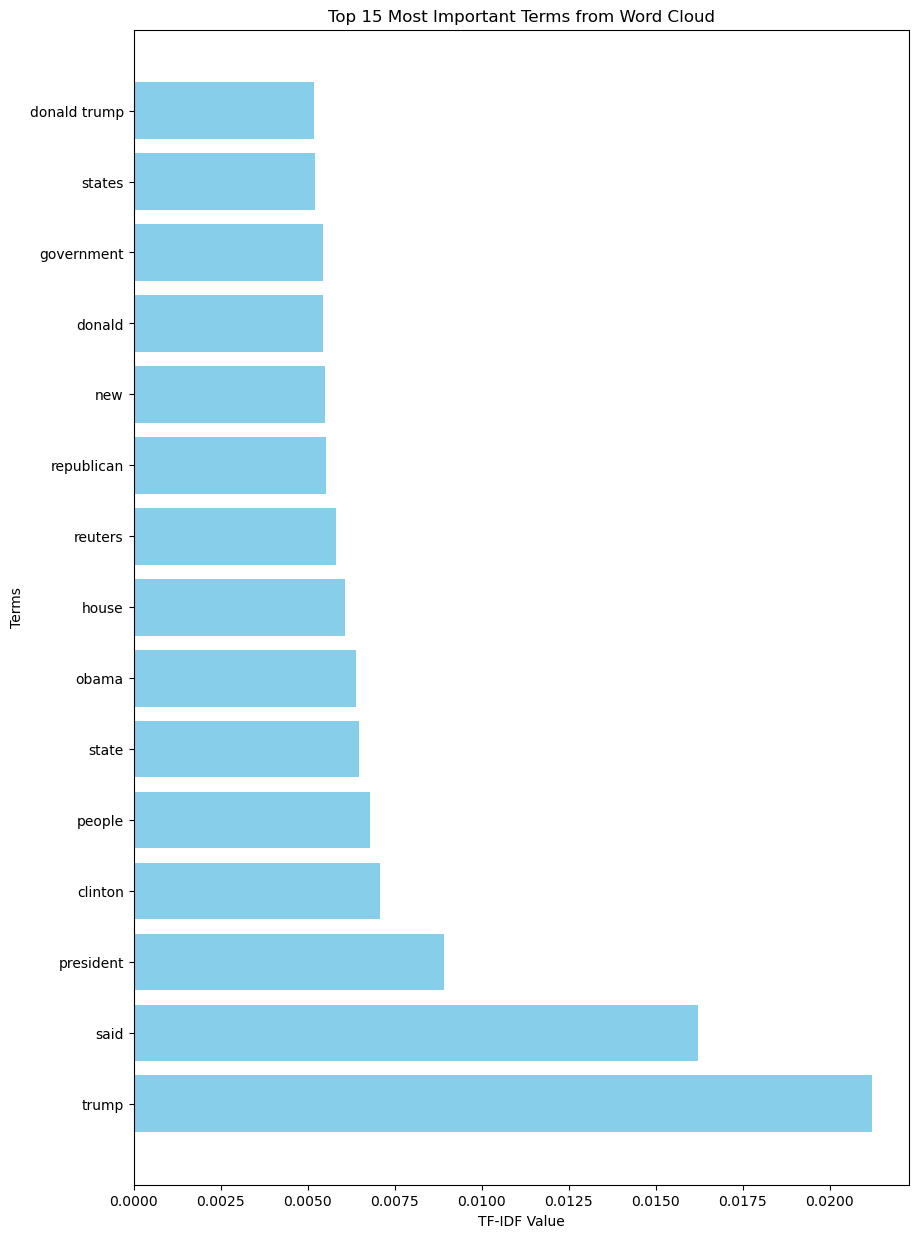

In [34]:
# Sort the terms based on their TF-IDF values in descending order
sorted_terms = sorted(term_tfidf_dict.items(), key=lambda x: x[1], reverse=True)

# Extract the top N terms and their TF-IDF values
top_n = 15  # You can adjust this value based on the number of terms you want to display
top_terms = [term[0] for term in sorted_terms[:top_n]]
top_tfidf_values = [term[1] for term in sorted_terms[:top_n]]

# Plot a bar graph
plt.figure(figsize=(10, 15))
plt.barh(top_terms, top_tfidf_values, color='skyblue')
plt.xlabel('TF-IDF Value')
plt.ylabel('Terms')
plt.title('Top {} Most Important Terms from Word Cloud'.format(top_n))
plt.show() 

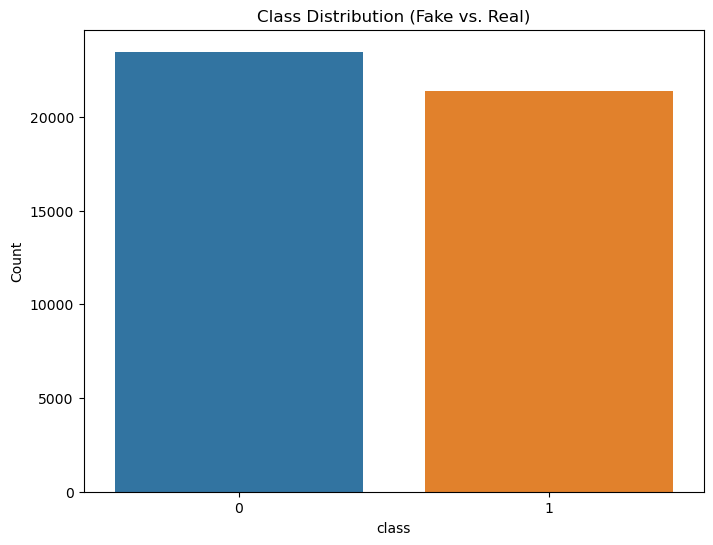

In [35]:
# Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='class')
plt.title('Class Distribution (Fake vs. Real)')
plt.xlabel('class')
plt.ylabel('Count')
plt.show() 

<AxesSubplot:xlabel='class', ylabel='count'>

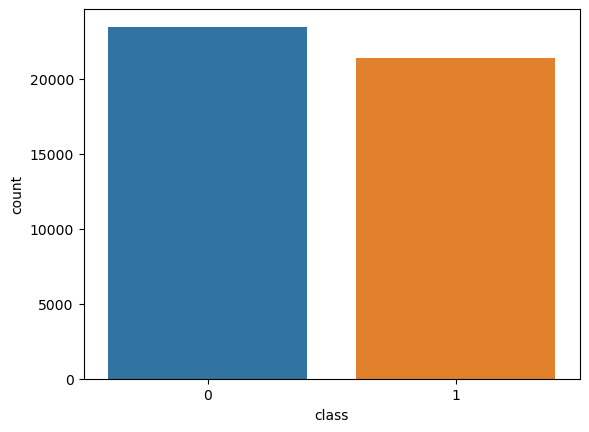

In [36]:
# Explore unique values
sns.countplot(data = df, 
              x='class', 
              order=df['class'].value_counts().index) 

# Model Building 

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size=0.2, random_state=42)

# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3), max_features=8000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Build a classifier (using Multinomial Naive Bayes as an example)
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# Make predictions on the training set
y_train_pred = classifier.predict(X_train_tfidf)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_classification_rep = classification_report(y_train, y_train_pred)

# Make predictions on the test set
y_test_pred = classifier.predict(X_test_tfidf)

# Evaluate the model on testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

# Print the results
print("Training Metrics:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print("\nTraining Confusion Matrix:")
print(train_conf_matrix)
print("\nTraining Classification Report:")
print(train_classification_rep)

print("\n--------------------------------------\n")

print("Testing Metrics:")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print("\nTesting Confusion Matrix:")
print(test_conf_matrix)
print("\nTesting Classification Report:")
print(test_classification_rep)


Training Metrics:
Training Accuracy: 0.9517

Training Confusion Matrix:
[[17830   892]
 [  842 16345]]

Training Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     18722
           1       0.95      0.95      0.95     17187

    accuracy                           0.95     35909
   macro avg       0.95      0.95      0.95     35909
weighted avg       0.95      0.95      0.95     35909


--------------------------------------

Testing Metrics:
Testing Accuracy: 0.9495

Testing Confusion Matrix:
[[4524  235]
 [ 218 4001]]

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4759
           1       0.94      0.95      0.95      4219

    accuracy                           0.95      8978
   macro avg       0.95      0.95      0.95      8978
weighted avg       0.95      0.95      0.95      8978



In [45]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size=0.2, random_state=42)

# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3), max_features=7000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Build a classifier (using Multinomial Naive Bayes as an example)
classifier = MultinomialNB()

# Create StratifiedKFold for cross-validation (stratified to ensure balanced classes)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store training and testing accuracies during cross-validation
train_accuracies = []
test_accuracies = []

# Perform cross-validation
for train_index, test_index in cv.split(X_train_tfidf, y_train):
    X_train_cv, X_test_cv = X_train_tfidf[train_index], X_train_tfidf[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Train the classifier
    classifier.fit(X_train_cv, y_train_cv)
    
    # Make predictions on the training set
    y_train_pred = classifier.predict(X_train_cv)
    
    # Make predictions on the test set
    y_test_pred = classifier.predict(X_test_cv)
    
    # Calculate and store training accuracy
    train_accuracy = accuracy_score(y_train_cv, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Calculate and store testing accuracy
    test_accuracy = accuracy_score(y_test_cv, y_test_pred)
    test_accuracies.append(test_accuracy)

# Print the results
print("Cross-Validation Results:")
print(f"Mean Training Accuracy: {sum(train_accuracies) / len(train_accuracies):.4f}")
print(f"Mean Testing Accuracy: {sum(test_accuracies) / len(test_accuracies):.4f}")
print(f"Training Accuracies: {train_accuracies}")
print(f"Testing Accuracies: {test_accuracies}")


Cross-Validation Results:
Mean Training Accuracy: 0.9511
Mean Testing Accuracy: 0.9487
Training Accuracies: [0.9504647196017684, 0.9518571378842204, 0.9513697914853622, 0.9504995300588297, 0.9515455304928989]
Testing Accuracies: [0.9529379003063213, 0.9452798663324979, 0.9483430799220273, 0.9512670565302144, 0.9455507589472218]


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    
X = df['text']
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

naive_bayes = MultinomialNB()

naive_bayes.fit(X_train_tfidf, y_train)

y_pred = naive_bayes.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 

Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4759
           1       0.93      0.93      0.93      4219

    accuracy                           0.93      8978
   macro avg       0.93      0.93      0.93      8978
weighted avg       0.93      0.93      0.93      8978


Confusion Matrix:
[[4474  285]
 [ 315 3904]]


In [73]:
# Converting Raw Data Into Matrix for Further Process - For Model 2-LR
from sklearn.feature_extraction.text import TfidfVectorizer

# Defining dependent and independent variables
x = df["text"] 
y = df["class"]

# Splitting Training and Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

# Convert text to vectors
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(X_test) 

## Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

#(X_train= xv_train, y_train) 

LogisticRegression()

In [ ]:
# Checking the Model Accuracy and Classification Report

In [62]:
pred_lr=LR.predict(xv_test) 

In [63]:
LR.score(xv_test, y_test)

0.9879705947872578

In [64]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4759
           1       0.98      0.99      0.99      4219

    accuracy                           0.99      8978
   macro avg       0.99      0.99      0.99      8978
weighted avg       0.99      0.99      0.99      8978



## Decision Tree Classification

In [66]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [67]:
pred_dt = DT.predict(xv_test)

In [68]:
DT.score(xv_test, y_test)

0.9950991312096236

In [69]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4759
           1       1.00      0.99      0.99      4219

    accuracy                           1.00      8978
   macro avg       1.00      1.00      1.00      8978
weighted avg       1.00      1.00      1.00      8978



## Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [71]:
pred_rfc = RFC.predict(xv_test)
RFC.score(xv_test, y_test)
print(classification_report(y_test, pred_rfc)) 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4759
           1       0.99      0.99      0.99      4219

    accuracy                           0.99      8978
   macro avg       0.99      0.99      0.99      8978
weighted avg       0.99      0.99      0.99      8978



## Gradient Boosting Classifier 

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train) 

GradientBoostingClassifier(random_state=0)

In [74]:
pred_gbc = GBC.predict(xv_test)
GBC.score(xv_test, y_test)
print(classification_report(y_test, pred_gbc)) 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4759
           1       0.99      1.00      0.99      4219

    accuracy                           0.99      8978
   macro avg       0.99      0.99      0.99      8978
weighted avg       0.99      0.99      0.99      8978



# Model Testing 

In [77]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))
                                                                                                            
                                                                                                              
        
  

In [86]:
news = str(input())
manual_testing(news)  

Georgia prosecutor in Trump election case requests August start date for trial Trump’s lawyers are opposing the proposed Aug. 5 start date, which would come just three months before the 2024 presidential election. 


LR Prediction: Not A Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


In [83]:
news = str(input())
manual_testing(news) 

Republicans face risks in picking off voters disaffected with Biden over Israel Winning over core Democratic constituencies may prove difficult for the GOP, which could still benefit from certain voters' staying on the sidelines. 


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


In [84]:
news = str(input())
manual_testing(news)  

Colorado judge rejects bid to keep Trump off the state's 2024 ballot The judge found that Trump "engaged in insurrection" by inciting the Jan. 6 riot, but said he could still appear on Colorado's primary ballot next year.


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Not A Fake News


In [85]:
news = str(input())
manual_testing(news)  

The New York state judge presiding over Donald Trump's $250 million New York civil fraud case knocked down his bid for a mistrial on Friday, calling the former president's arguments "utterly without merit."  In a brief and blunt ruling, Judge Arthur Engoron said he was refusing to even allow arguments on the mistrial motion because the premises of the motion were flawed and it would be "futile." The judge described Trump's rationale for halting the trial, now in its second month, as "disingenuous," made in "bad faith" and "nonsensical."  Trump's attorneys filed the mistrial motion Wednesday, arguing that Engoron and his law clerk had demonstrated bias against the former president. They also accused the clerk, who sits alongside the judge in the courtroom, of improperly acting as a "co-judge" in the case.  The clerk’s “position as a de facto co-judge" violates the judicial code and “creates the appearance, if not the fact, of a co-judge presiding over the trial,” they wrote.  Engoron, w